In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Zad 1

In [3]:
fifa = pd.read_csv('/content/FIFA22_official_data.csv')
fifa.info()


FileNotFoundError: [Errno 2] No such file or directory: '/content/FIFA22_official_data.csv'

<ipython-input-16-458290919765>:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  name = row[0]
<ipython-input-16-458290919765>:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  values = row[1:].tolist() + [row[1]]


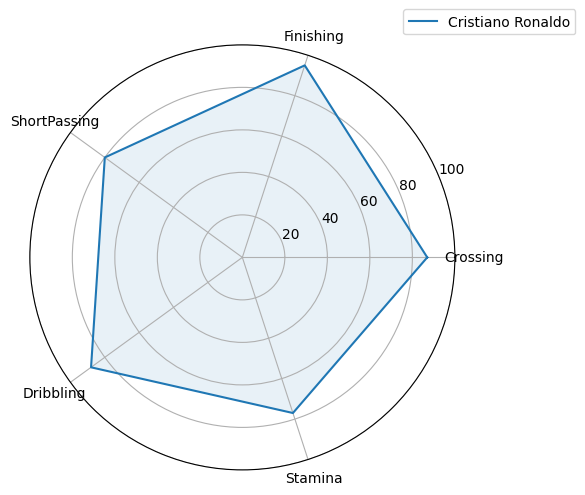

In [16]:
traits = ['Crossing', 'Finishing', 'ShortPassing', 'Dribbling', 'Stamina']
chosen = fifa[fifa['Name'].isin(['Cristiano Ronaldo', 'Lionel Messi', 'Kylian Mbappé'])]
data  = chosen[['Name']+ traits]

def plot_radar(fifa):
  features = fifa.columns[1:]
  num_features = len(features)
  angles = np.linspace(0, 2*np.pi, len(features), endpoint=False).tolist()
  angles += angles[:1]

  fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

  for i, row in fifa.iterrows():
      name = row[0]
      values = row[1:].tolist() + [row[1]]
      ax.plot(angles, values, label=name)
      ax.fill(angles, values, alpha=0.1)

  ax.set_xticks(angles[:-1])
  ax.set_xticklabels(features)
  ax.set_ylim(0, 100)
  ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
  plt.tight_layout()
  plt.show()


plot_radar(data)

Zad 2



In [ ]:
import matplotlib.animation as animation
from IPython import get_ipython
from IPython.display import display

pkn = pd.read_csv('pkn.txt', sep=',')
pkn.info()
print(type(pkn))
pkn.head()

In [18]:
pkn.columns = pkn.columns.str.strip()
pkn['<DATE>'] = pd.to_datetime(pkn['<DATE>'])
pkn['<CLOSE>'] = pd.to_numeric(pkn['<CLOSE>'], errors='coerce')

date = pkn['<DATE>']
prices = pkn['<CLOSE>']




<ipython-input-22-7ba84953bfe0>:20: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(x_data[0], x_data[-1])


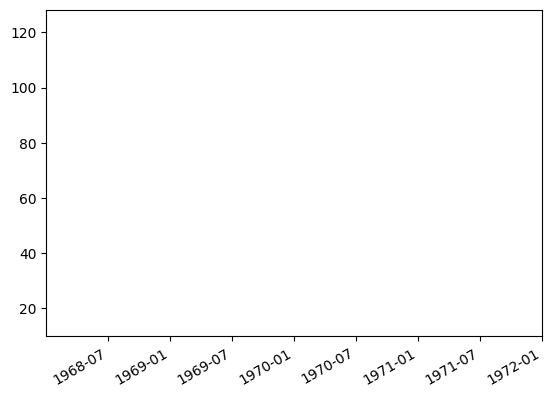

In [22]:
fig, ax = plt.subplots()
line, = ax.plot([], [], lw=2)

ax.set_ylim(prices.min() * 0.95, prices.max() * 1.1)

x_data = []
y_data = []

def update(frame):

    if frame < len(prices):
        x_data.append(date.iloc[frame])
        y_data.append(prices.iloc[frame])

        line.set_data(x_data, y_data)

        if len(x_data) > 20:
            ax.set_xlim(x_data[-20], x_data[-1])
        else:
            ax.set_xlim(x_data[0], x_data[-1])

        fig.autofmt_xdate()

    return line,


ani = animation.FuncAnimation(fig, update, frames=range(len(prices)), interval=100, blit=True)

plt.show()

Zad 3

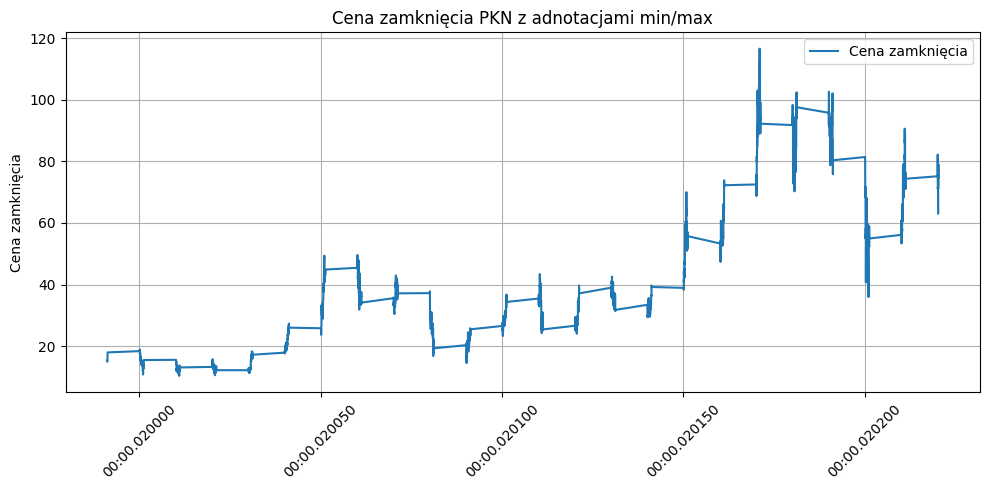

In [28]:
min_idx = prices.idxmin()
max_idx = prices.idxmax()
plt.figure(figsize=(10, 5))
plt.plot(date, prices, label='Cena zamknięcia')
ax.annotate("MAX",
            xy=(date[max_idx], prices[max_idx]), xycoords='data',
            xytext=(date[int(len(date)*0.2)], prices.mean()), textcoords='data',
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3"),
            fontsize=10, color='red')
ax.annotate("MIN",
            xy=(date[min_idx], prices[min_idx]), xycoords='data',
            xytext=(date[int(len(date)*0.8)], prices.mean()), textcoords='data',
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3"),
            fontsize=10, color='green')
plt.ylabel('Cena zamknięcia')
plt.title('Cena zamknięcia PKN z adnotacjami min/max')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.legend()
plt.show()

Zad 4

In [32]:
pkn['<DATE>'] = pd.to_datetime(pkn['<DATE>'])
pkn['Rok'] = pkn['<DATE>'].dt.year
pkn['Miesiac'] = pkn['<DATE>'].dt.month

monthly_close = pkn.groupby(['Rok', 'Miesiac'])['<CLOSE>'].agg(['min', 'max']).reset_index()
def highlight_min(s):
    is_min = s == s.min()
    return ['background-color: lightgreen' if v else '' for v in is_min]
def highlight_max(s):
    is_max = s == s.max()
    return ['background-color: lightcoral' if v else '' for v in is_max]
styled = monthly_close.style.apply(highlight_min, subset=['min']) \
                            .apply(highlight_max, subset=['max']) \
                            .set_caption('Minimalne i maksymalne ceny zamknięcia (miesięcznie)')

styled
monthly_close = pkn.groupby(['Rok', 'Miesiac'])['<CLOSE>'].agg(['min', 'max']).reset_index()
def highlight_min(s):
    is_min = s == s.min()
    return ['background-color: lightgreen' if v else '' for v in is_min]
def highlight_max(s):
    is_max = s == s.max()
    return ['background-color: lightcoral' if v else '' for v in is_max]
styled = monthly_close.style.apply(highlight_min, subset=['min']) \
                            .apply(highlight_max, subset=['max']) \
                            .set_caption('Minimalne i maksymalne ceny zamknięcia (miesięcznie)')

styled

,Rok,Miesiac,min,max
0,1970,1,10.380000,116.590000
